<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Semana5_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y Analítica de Datos
___
Semana 5: Data Analysis with Python  
Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338

##Data pre-processing

El preprocesamiento de datos es un paso necesario en el análisis de datos. Es el proceso de convertir datos de una forma "raw" a otro formato listo para el análisis.

El preprocesamiento de datos también es llamado "data cleaning" o "data wrangling".

Un valor faltante ocurre cuando una entrada de dato está vacía.

La normalización es una forma de traer a todos los datos a un rango similar para comparaciones más útiles entre los datos. Hay técnicas de centrado y de escalado.

##Dealing with missing values in Python

Cuando no hay un valor almacenado de una característica para una observación particular, se dice que la característica tiene un valor faltante. Usualmente un valor faltante aparece en un conjunto de datos como "?", "N/A", 0 o simplemente una celda vacía.

Opciones para lidiar con valores faltantes:


*   Averiguar si la persona que recolectó los datos puede recuperar ese dato.
*   Simplemente remover los datos en los que se encontró ese valor faltante. Se puede eliminar toda la variable o solo la entrada con el valor faltante. Si no se tienen muchas observaciones con valores faltantes, usualmente lo mejor es deshechar solo la entrada particular.
*   Reemplazar los datos es mejor, ya que de esta manera no se desperdician datos. Es menos preciso porque se debe de reemplazar el dato con una suposición del valor que tendría que tener el dato.  
   - Una manera de reemplazar los valores faltantes es con el promedio de los datos.
   - Una manera de reemplazar los valores faltantes que son categóricos es con la moda.
   - Reemplazar los datos basándose en información relevante.  
*   Otra opción es dejar los datos faltantes tal como están.



La librería pandas cuenta con un método llamado dropna. Se tiene que especificar el eje para borrar los datos faltantes. axis = 0, elimina la fila completa y axis = 1 elimina la columna entera.
df.dropna()

In [12]:
#Se importa la librería, se lee el archivo y se convierte en un dataframe
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header =  None) 


Los nombres de las columnas no pueden icluir '-' porque de esta manera no se puede acceder a las columnas como atributos del objeto data frame.

In [13]:
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']
df.columns = headers #Reemplazar nombres de columnas

In [14]:
#inplace = True permite que la modificación se guardada directamente en el dataframe, sin necesidad de asignarla a una variable
#Elimina las filas que tengan valores faltantes en la columna price
df.dropna(subset=['price'], axis = 0, inplace = True) 

El método replace se utiliza para reemplazar valores faltantes por otro valor especificado. df.replace(valor_faltante, nuevo_valor)

In [15]:
df.replace('?', np.nan, inplace=True)
df['normalized_losses'] = pd.to_numeric(df['normalized_losses']) #Se convierten los valores a tipo numérico porque se almacenaron como string
media = np.mean(df.normalized_losses)
df['normalized_losses'] = df['normalized_losses'].replace(np.nan, media)

##Data formatting with Python

Hay veces que es necesario darle un formato específico a los datos, especialmente cuando se quieren llevar a cabo análisis estadísticos con mayor facilidad

Realizar cálculos a una columna entera

In [16]:
df['city_mpg'] = 235/df['city_mpg'] #En este ejemplo se convierten los datos de millas por galón a litros por cada 100 km
df.rename(columns={'city_mpg':'city_L/100km'}, inplace=True) #Se renombran las columnas para que haya coherencia con los datos almacenados
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_L/100km,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


Tipos de datos incorrectos  
Existen varios tipos de datos en pandas:


*   Objects (caracteres o cadenas)
*   Int64 (Enteros)
*   Float64 (Números decimales)


El método astype() se puede utilizar para convertir los datos de un tipo a otro.


##Data Normalization

La normalización de datos es útil para uniformizar los datos de variables con diferente rango. La normalización permite una comparación más justa entre las diferentes variables de entrada. Con esto se asegura que todas las variables tengan el mismo impacto. Cuando se aplican modelos, por ejemplo, el modelo de regresión lineal, una variable con un rango de valores alto influenciará más en el resultado que una variable con un rango de valores más pequeño.

Métodos para normalizar datos.



*   Simple feature scaling. Simplemente se divide cada dato entre el valor máximo de esa columna.

$$x_{new} =\frac{x_{old}}{x_{max}}$$

*   Min-Max. Este método convierte el rango de los datos al rango de [0,1].

$$x_{new} =\frac{x_{old}-x_{min}}{x_{max}-x_{min}}$$

*   Z-score o standard score. Este método agrupa a los datos alrededor de 0.

$$x_{new} =\frac{x_{old}-\mu}{σ}$$

In [20]:
#Ejemplo de simple feature scaling
ndf = df.copy()
ndf['length'] = ndf['length']/ndf['length'].max()
ndf[['length']]


,length
0,0.811148
1,0.811148
2,0.822681
3,0.848630
4,0.848630
...,...
200,0.907256
201,0.907256
202,0.907256
203,0.907256


In [21]:
ndf = df.copy()
min = ndf['length'].min()
max = ndf['length'].max()
ndf['length'] = (ndf['length']-min)/(max-min)
ndf[['length']]

,length
0,0.413433
1,0.413433
2,0.449254
3,0.529851
4,0.529851
...,...
200,0.711940
201,0.711940
202,0.711940
203,0.711940


In [25]:
ndf = df.copy()
mean = ndf['length'].mean()
stdev = ndf['length'].std()
ndf['length'] = (ndf['length']-mean)/(stdev)
ndf[['length']]

,length
0,-0.425480
1,-0.425480
2,-0.230948
3,0.206750
4,0.206750
...,...
200,1.195622
201,1.195622
202,1.195622
203,1.195622


##Binning in Python

Binning es la agrupación de valores en contenedores. Es útil para convertir valores numéricos en variables categóricas.

In [31]:
#Ejemplo para agrupar los valores numéricos de la columna price en 3 categorías
#Se generan 4 números que servirán como espaciadores del mismo tamaño para los datos
#Se utilizan el valor mínimo y máximo de los datos para generarlos
df['price'] = pd.to_numeric(df['price'])
bins = np.linspace(df['price'].min(), df['price'].max(), 4) 
group_names = ['low', 'medium', 'high'] #Se establecen los nombres de las categorías
df['price_binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
df[['price_binned', 'price']]

,price_binned,price
0,low,13495.0
1,low,16500.0
2,low,16500.0
3,low,13950.0
4,low,17450.0
...,...,...
200,low,16845.0
201,medium,19045.0
202,medium,21485.0
203,medium,22470.0


##Turning categorical variables into quantitative variables in Python

A veces es necesario transformar las variables categóricas en variables numéricas, ya que muchos modelos estadísticos no aceptan texto como entrada.  
Se codifican los valores añadiendo nuevas características correspondientes a cada elemento único de la característica original que se quiere codificar. Esta técnica es llamada One Hot Encoding.

In [47]:
df2 = pd.get_dummies(df['fuel_type']) #El método get_dummies automáticamente genera un data frame con la codificación de los valores de la columna
df2.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [48]:
df = pd.concat([df, df2], axis = 1)#Se combinan el data frame obtenido a partir de get dummies con el data frame original

In [49]:
df.drop('fuel_type', axis=1, inplace=True)
df.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,stroke,compression_ratio,horsepower,peak_rpm,city_L/100km,highway_mpg,price,price_binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,11.190476,27,13495.0,low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,11.190476,27,16500.0,low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,12.368421,26,16500.0,low,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,9.791667,30,13950.0,low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,13.055556,22,17450.0,low,0,1


In [36]:
#Para contar el número de valores presentes en una columna
df['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [38]:
df['num_of_doors'].value_counts().idxmax() #Con idxmax se puede obtener el valor más común

'four'

In [39]:
df.dropna(subset=["price"], axis=0, inplace=True) #Código para eliminar las filas que tienen valor nan en la columna price

In [40]:
df.reset_index(drop=True, inplace=True) #Con esto se reestablecen los índices al eliminar filas

In [41]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_L/100km,highway_mpg,price,price_binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495.0,low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500.0,low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500.0,low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950.0,low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450.0,low


Text(0.5, 1.0, 'price bins')

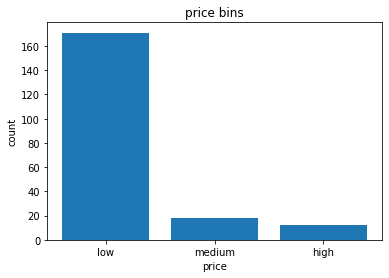

In [43]:
#Visualización de los datos obtenidos a partir de la categorización de los datos de la columna price
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["price_binned"].value_counts())
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

Text(0.5, 1.0, 'price bins')

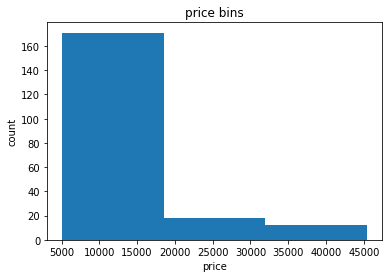

In [45]:
#Visualización de los datos de la columna price en un histograma con 3 bins
plt.pyplot.hist(df['price'], bins=3)
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

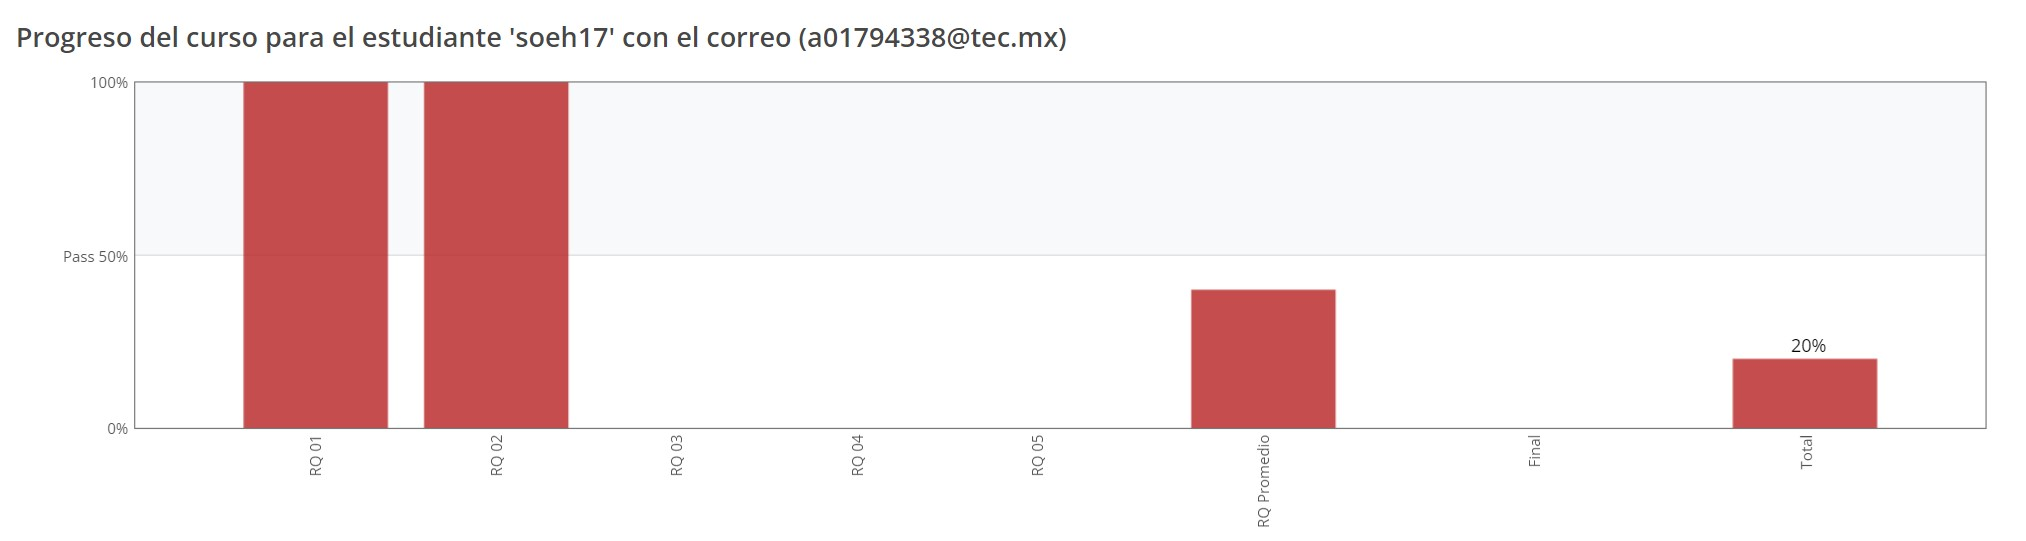